# Introduction to Unsupervised Machine Learning
By AA Miller (2017 September 16)  
Updated by G Hosseinzadeh (2025 May 13)

In [107]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1) Clustering

First let's load the iris data set, which is included in `scikit-learn`, and read its description. The `iris` object below acts like a dictionary that includes tabular data along with some metadata.

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
data = iris['data']


**Problem 1a** Make a pair plot (a.k.a. scatter matrix, a.k.a. corner plot) showing all four features plotted against each other. You can do this any way you want, but I suggest using `pandas.plotting.scatter_matrix` or `seaborn.pairplot` instead of `corner.corner` because there are so few points.

In [ ]:
import pandas as pd

data = iris['data']
df = pd.DataFrame(data, columns = [iris.feature_names])

**Problem 1b** Let's try to find clusters in this 4-dimensional feature space. Fit two different $K$-means models to the iris data, one with 2 clusters and one with 3 clusters. Make new pair plots but color the points by their cluster membership. According to your plots, which feature(s) is/are most correlated with the clusters? Why might that be?

array([[<Axes: xlabel="('sepal length (cm)',)", ylabel="('sepal length (cm)',)">,
        <Axes: xlabel="('sepal width (cm)',)", ylabel="('sepal length (cm)',)">,
        <Axes: xlabel="('petal length (cm)',)", ylabel="('sepal length (cm)',)">,
        <Axes: xlabel="('petal width (cm)',)", ylabel="('sepal length (cm)',)">],
       [<Axes: xlabel="('sepal length (cm)',)", ylabel="('sepal width (cm)',)">,
        <Axes: xlabel="('sepal width (cm)',)", ylabel="('sepal width (cm)',)">,
        <Axes: xlabel="('petal length (cm)',)", ylabel="('sepal width (cm)',)">,
        <Axes: xlabel="('petal width (cm)',)", ylabel="('sepal width (cm)',)">],
       [<Axes: xlabel="('sepal length (cm)',)", ylabel="('petal length (cm)',)">,
        <Axes: xlabel="('sepal width (cm)',)", ylabel="('petal length (cm)',)">,
        <Axes: xlabel="('petal length (cm)',)", ylabel="('petal length (cm)',)">,
        <Axes: xlabel="('petal width (cm)',)", ylabel="('petal length (cm)',)">],
       [<Axes: xlabel="

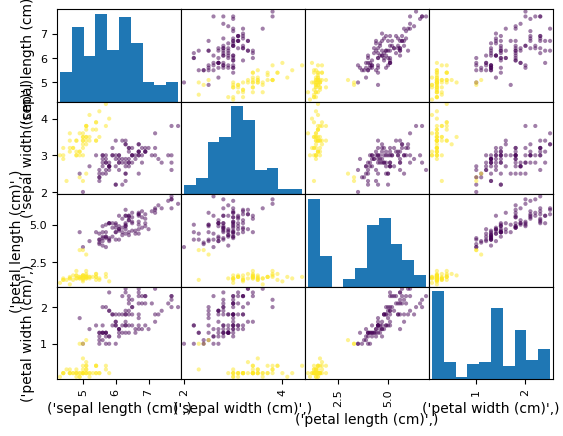

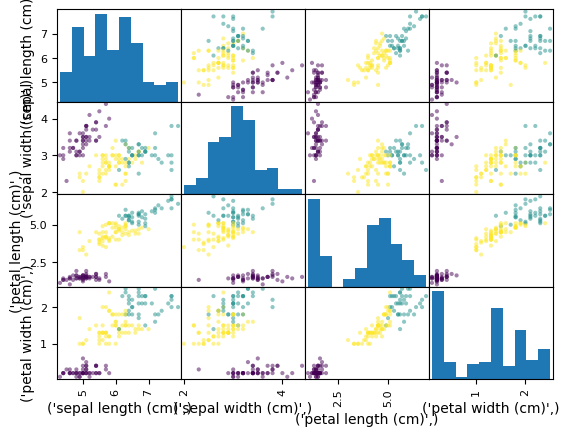

In [ ]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2)  # complete
kmeans2.fit(df)  # complete
clusters2 = kmeans2.labels_  # complete

df2 = pd.DataFrame(data, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

df2['cluster2'] = clusters2
pd.plotting.scatter_matrix(df, marker='.', c=clusters2)

# repeat with 3 clusters
kmeans3 = KMeans(n_clusters=3)  # complete
kmeans3.fit(df)  # complete
clusters3 = kmeans3.labels_   # complete

df3 = pd.DataFrame(data, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

df3['cluster3'] = clusters2
pd.plotting.scatter_matrix(df, marker='.', c=clusters3)


*Complete*

The truth is that the iris data set is fairly small and straightfoward. Nevertheless, we will now examine the clustering results after re-scaling the features. [Some algorithms are notoriously sensitive to the feature scaling, so it is important to know about this step.] Imagine you are classifying stellar light curves: the data set will include contact binaries with periods of $\sim 0.1 \; \mathrm{d}$ and Mira variables with periods of $\gg 100 \; \mathrm{d}$. Without re-scaling, this feature that covers 4 orders of magnitude may dominate all others in the final model projections.

The two most common forms of re-scaling are to rescale to a Gaussian with mean $= 0$ and variance $= 1$, or to rescale the min and max of the feature to $[0, 1]$. The best normalization is problem dependent. The [`sklearn.preprocessing`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module makes it easy to re-scale the feature set. **It is essential that the same scaling used for the training set be used for all other data run through the model.** The testing, validation, and field observations cannot be re-scaled independently. This would result in meaningless final classifications/predictions. 

**Problem 1c** Re-scale the features to normal distributions, and perform $K$-means clustering on the iris data. How do the results compare to those obtained earlier? 

array([[<Axes: xlabel='sepal length', ylabel='sepal length'>,
        <Axes: xlabel='sepal width', ylabel='sepal length'>,
        <Axes: xlabel='petal length', ylabel='sepal length'>,
        <Axes: xlabel='petal width', ylabel='sepal length'>],
       [<Axes: xlabel='sepal length', ylabel='sepal width'>,
        <Axes: xlabel='sepal width', ylabel='sepal width'>,
        <Axes: xlabel='petal length', ylabel='sepal width'>,
        <Axes: xlabel='petal width', ylabel='sepal width'>],
       [<Axes: xlabel='sepal length', ylabel='petal length'>,
        <Axes: xlabel='sepal width', ylabel='petal length'>,
        <Axes: xlabel='petal length', ylabel='petal length'>,
        <Axes: xlabel='petal width', ylabel='petal length'>],
       [<Axes: xlabel='sepal length', ylabel='petal width'>,
        <Axes: xlabel='sepal width', ylabel='petal width'>,
        <Axes: xlabel='petal length', ylabel='petal width'>,
        <Axes: xlabel='petal width', ylabel='petal width'>]], dtype=object)

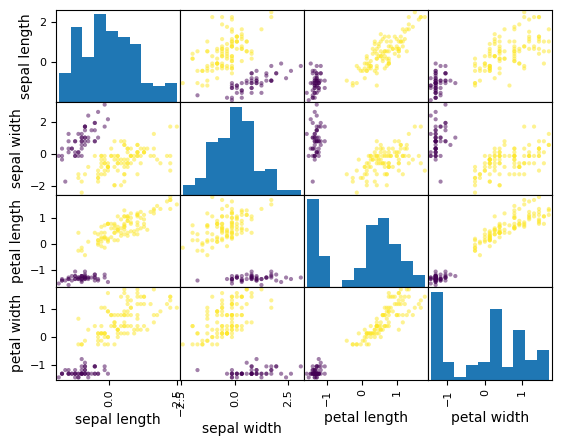

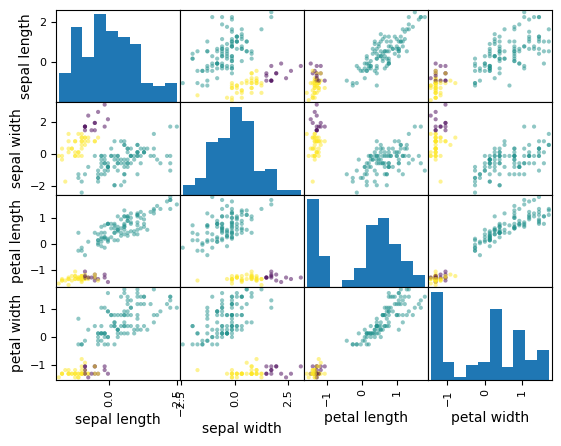

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
scaler_df= scaler.transform(df)

scaler_df2_c = pd.DataFrame(scaler_df, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])#used for to add a new column that will be used to plot the clusters
scaler_df2 = pd.DataFrame(scaler_df, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

fit_kmeans2 = KMeans(n_clusters=2)  # complete
fit_kmeans2.fit(scaler_df2)  # complete
clusters2 = fit_kmeans2.labels_  # complete
scaler_df2_c['fit_cluster2'] = clusters2
pd.plotting.scatter_matrix(scaler_df2, marker='.', c=clusters2)

scaler = StandardScaler()
scaler.fit(df)
scaler.transform(df)

scaler_df3_c = pd.DataFrame(scaler_df, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])#used for to add a new column that will be used to plot the clusters
scaler_df3 = pd.DataFrame(scaler_df, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

fit_kmeans3 = KMeans(n_clusters=3)  # complete
fit_kmeans3.fit(scaler_df3)  # complete
clusters3 = fit_kmeans3.labels_  # complete
scaler_df3_c['fit_cluster3'] = clusters3
pd.plotting.scatter_matrix(scaler_df3, marker='.', c=clusters3)


# plot

*Complete*

**Problem 1d** Let's try more complex feature engineering using principal component analysis. Find the principal components of the iris data set and cluster the data points according their projection onto the **top 2** principal components. How much of the variance do these two components capture?  
Plot the results both in the principal component space *and* in the original feature space. How do your results compare to the simpler preprocessing? Is there another benefit to using PCA?

Text(0, 0.5, 'PCA 2')

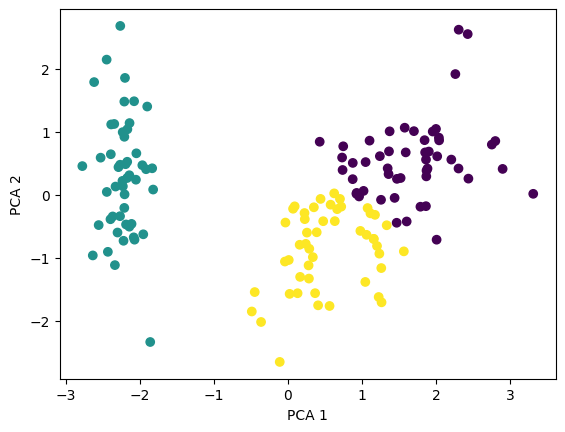

In [120]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(df)  
scaler_df = scaler.transform(df)

pca = PCA(n_components=2)
pca.fit(scaler_df)
scaled_pca_df = pca.transform(scaler_df) 

pca_kmeans3 = KMeans(n_clusters=3)  # complete
pca_kmeans3.fit(scaled_pca_df)  # complete
pca_clusters3 = pca_kmeans3.predict(scaled_pca_df) # complete

plt.scatter(scaled_pca_df[:, 0], scaled_pca_df[:, 1], c = pca_clusters3)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

array([[<Axes: xlabel="('sepal length (cm)',)", ylabel="('sepal length (cm)',)">,
        <Axes: xlabel="('sepal width (cm)',)", ylabel="('sepal length (cm)',)">,
        <Axes: xlabel="('petal length (cm)',)", ylabel="('sepal length (cm)',)">,
        <Axes: xlabel="('petal width (cm)',)", ylabel="('sepal length (cm)',)">],
       [<Axes: xlabel="('sepal length (cm)',)", ylabel="('sepal width (cm)',)">,
        <Axes: xlabel="('sepal width (cm)',)", ylabel="('sepal width (cm)',)">,
        <Axes: xlabel="('petal length (cm)',)", ylabel="('sepal width (cm)',)">,
        <Axes: xlabel="('petal width (cm)',)", ylabel="('sepal width (cm)',)">],
       [<Axes: xlabel="('sepal length (cm)',)", ylabel="('petal length (cm)',)">,
        <Axes: xlabel="('sepal width (cm)',)", ylabel="('petal length (cm)',)">,
        <Axes: xlabel="('petal length (cm)',)", ylabel="('petal length (cm)',)">,
        <Axes: xlabel="('petal width (cm)',)", ylabel="('petal length (cm)',)">],
       [<Axes: xlabel="

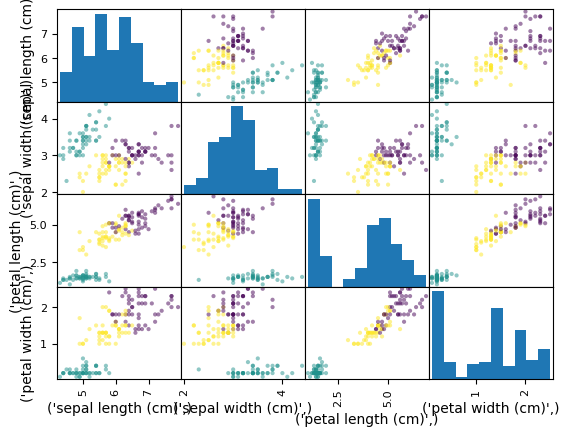

In [ ]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(df)  
scaler_df = scaler.transform(df)

pca = PCA(n_components=2)
pca.fit(scaler_df)
scaled_pca_df = pca.transform(scaler_df) 

scaled_pca_df_c = pd.DataFrame(scaled_pca_df)
scaled_pca_df= pd.DataFrame(scaled_pca_df, columns = ['1', '2'])#this part confused me but I dont think it really matters all that it is used for is to get the cluster labels

pca_kmeans3 = KMeans(n_clusters=3)  # complete
pca_kmeans3.fit(scaled_pca_df)  # complete
pca_clusters3 = pca_kmeans3.predict(scaled_pca_df) # complete

pd.plotting.scatter_matrix(df, marker='.', c=pca_clusters3)

*Complete*

**Problem 2e** Our data set might include outliers that should not belong to any of the clusters, but $K$-means will always assign points to the nearest cluster. Instead, try clustering the iris data using an algorithm called `DBSCAN`. Play around with the tuning parameters to see how they affect the final clustering results. How does the use of `DBSCAN` compare to $K$-means? Can you obtain 3 clusters with `DBSCAN`?

*Note - DBSCAN labels outliers as `-1`, so all these points will be plotted as the same color.*


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


'I couldnt get it to make 3 different clusters'

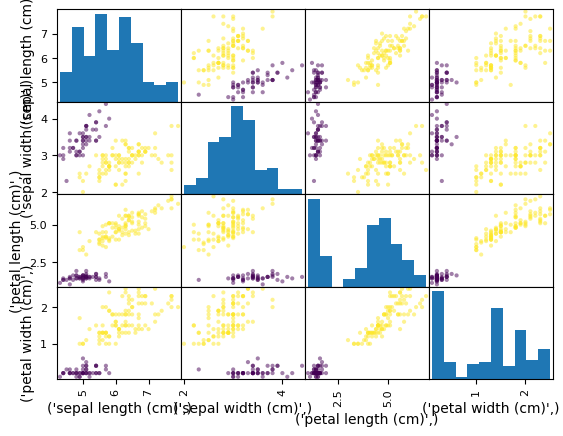

In [60]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1.35, min_samples=3).fit(df)

clusters = clustering.labels_
print(clusters)
pd.plotting.scatter_matrix(df, marker='.', c=clusters)

'''I couldnt get it to make 3 different clusters'''

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


'I couldnt get it to make 3 different clusters'

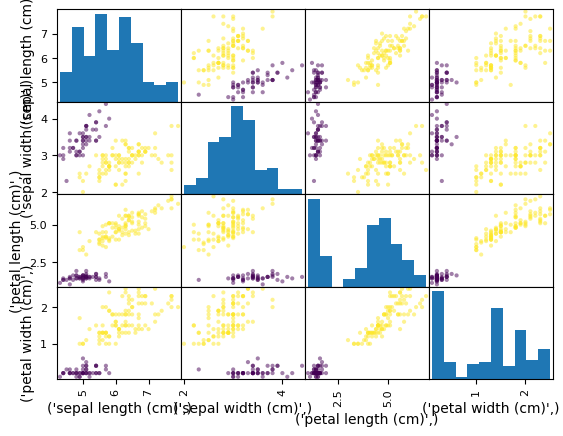

In [123]:
from sklearn.cluster import DBSCAN

scaler = StandardScaler() #
scaler.fit(df)  
scaler_df = scaler.transform(df)

clustering = DBSCAN(eps=1.5, min_samples=3).fit(scaler_df)

scaler_clusters = clustering.labels_
print(clusters)
pd.plotting.scatter_matrix(df, marker='.', c=scaler_clusters)

'''I couldnt get it to make 3 different clusters'''

*Complete*

# Problem 2) Correlation Function

Imagine we looked in the sky in a certain direction and saw a perfect circle of 50 galaxies with a radius of $1^\circ$. This would imply highly correlated structure in the universe on the scale of $\sim 2^\circ$. Let's show this by calculating the correlation function for such a structure.

**Problem 2a** Generate the data set in question, the right ascension and declination ($x$ and $y$) for a circle of 50 galaxies centered on (0, 0) with radius $1^\circ$. Ignore spherical geometry for now and just assume everything is Euclidean for this small patch of sky.

(-4.0, 4.0)

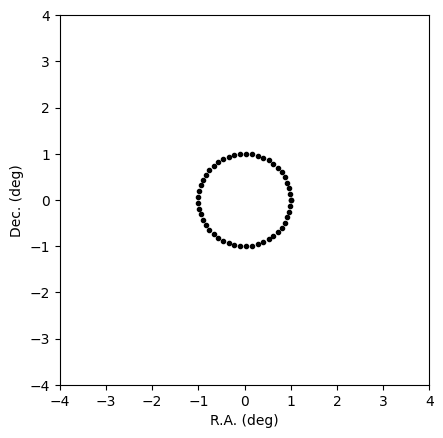

In [124]:
N=50
r=1
theta = np.linspace(0, 2*np.pi, N)
xx = r*np.cos(theta)
yy = r*np.sin(theta)

ax = plt.axes(aspect='equal')
ax.plot(xx, yy, '.', color='black')
ax.set_xlabel('R.A. (deg)')
ax.set_ylabel('Dec. (deg)')
ax.set_xlim(-4., 4.)
ax.set_ylim(-4., 4.)

**Problem 2b** Generate a data set of randomly distributed points over the same patch of sky. Make sure your data set is $\sim20\times$ larger than the "observed" data set above. To avoid edge effects, I suggest using $-4<x,y<4$.

(-4.0, 4.0)

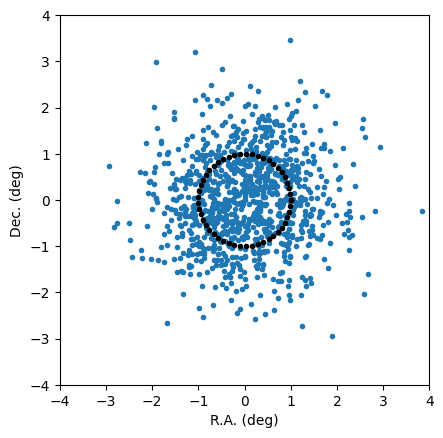

In [125]:
xr = np.random.randn(N*20)
yr = np.random.randn(N*20)

ax = plt.axes(aspect='equal')
ax.plot(xr, yr, '.')
ax.plot(xx, yy, '.', color='black')
ax.set_xlabel('R.A. (deg)')
ax.set_ylabel('Dec. (deg)')
ax.set_xlim(-4., 4.)
ax.set_ylim(-4., 4.)

**Problem 2c** Calculate the distance between each pair of points in each data set. Plot histograms of each set of distances.  
*Hint:* exclude pairs matching the same point with itself.  
*Challenge:* try using broadcasting instead of loops to make each pair. 

Text(0, 0.5, 'Number of pairs')

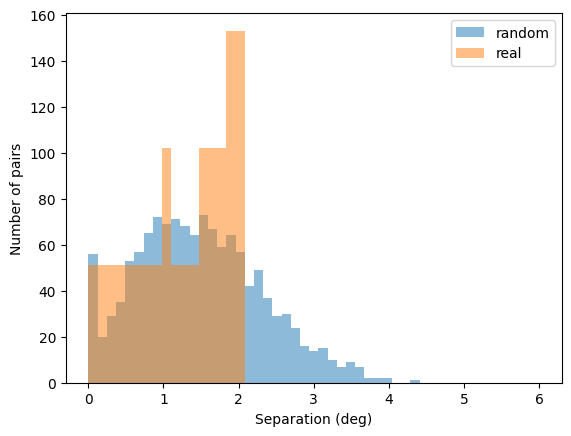

In [131]:
x_data = np.array(xx)
y_data = np.array(yy)   

xr_data = np.array(xr)
yr_data = np.array(yr)  

points_real = np.array([x_data, y_data]).T
points_rand = np.array([xr_data, yr_data]).T

diff_real = points_real[:, np.newaxis, :] - points_real[np.newaxis, :, :] #broadcasting happens here in the numpy array for the difference
dist_real = np.sqrt((diff_real**2).sum(axis=-1))

diff_rand = points_rand[:, np.newaxis, :] - points_rand[np.newaxis, :, :] #broadcasting happens here in the numpy array for the difference
dist_rand = np.sqrt((diff_rand**2).sum(axis=-1))

i, j = np.triu_indices(N) #gets rid of matching pairs matching the same point upper triangle part of the data
dist_real = dist_real[i, j]
dist_rand = dist_rand[i, j]

bins = np.linspace(0, 6, N)

n_rand, bins, _ = plt.hist(dist_rand, bins=bins, label = 'random', alpha=0.5)
n_real, bins, _ = plt.hist(dist_real, bins=bins, label = 'real', alpha=0.5) 

plt.legend(loc='best')
plt.xlabel('Separation (deg)')
plt.ylabel('Number of pairs')


**Problem 2d** Estimate the two-point autocorrelation function for the real data, with the random data as a reference. Plot it as a function of separation. What did you learn about the large-scale structure in this portion of the sky?

C:\Users\young\AppData\Local\Temp\ipykernel_19848\3640423539.py:1: RuntimeWarning: invalid value encountered in divide
  autocorr = (n_real / n_rand)-1 #I dont know if I did this correctly, but


Text(0, 0.5, 'Autocorrelation')

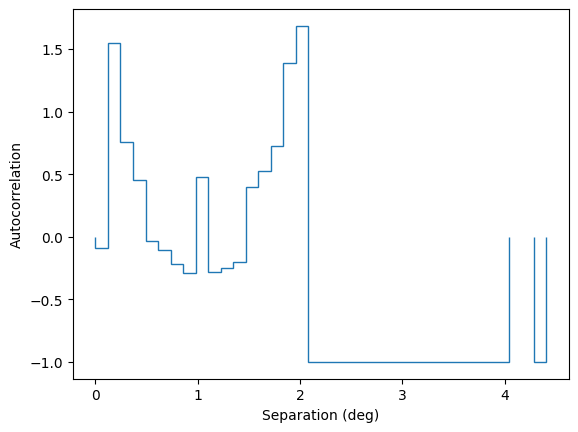

In [ ]:
autocorr = (n_real / n_rand) - 1 #I dont know if I did this correctly, but it kinda looks like an outline of my data 
plt.stairs(autocorr, bins)
plt.xlabel('Separation (deg)')
plt.ylabel('Autocorrelation')

*Complete*